# Clustering Analysis
### Table of Contents:

01. Libraries Import
02. Data Import
03. Data Cleaning
04. The Elbow Technique
05. k-means Clustering
06. Final Observations
07. Export Data

## 01. Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Adjusting the settings so that charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Data Import

In [3]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A6 National Parks Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepd Data', 'NatlParks_clean.csv'))

## 03. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'ParkName', 'UnitCode', 'Region', 'State', 'Year',
       'Month', 'RecVisits', 'NonRecVisits', 'RecHours', 'NonRecHours',
       'TentCampers', 'RVCampers', 'Backcountry', 'RecHrsRange'],
      dtype='object')

In [6]:
# Need to drop the 'Unnamed: 0' column

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
# Dropping categorical data columns

df_stats = df.drop(columns = ['ParkName', 'UnitCode', 'Region', 'State', 'Year', 'Month', 'RecHrsRange'])

In [8]:
df_stats.head()

,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry
0,11930,600,78738,600,0,0,0
1,12388,600,81758,600,0,0,0
2,22684,600,149716,600,0,0,0
3,59471,600,344929,600,1338,174,0
4,157406,7500,894751,7500,7800,1467,29


In [9]:
df_stats.shape

(7560, 7)

## 04. The Elbow Technique

In [10]:
# Defining the range of potential clusters in the data

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Create scores to represent the rates of variation for clusters & print them

score = [kmeans[i].fit(df_stats).score(df_stats) for i in range(len(kmeans))]

score

[-3.4764824147220084e+16,
 -9838744229033788.0,
 -4659338892776749.0,
 -3095517870390117.5,
 -1967719728209490.0,
 -1391574138237862.8,
 -1101322775992337.6,
 -891334295397809.2,
 -739939367424926.9]

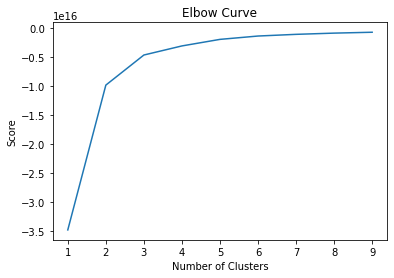

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count of clusters is three.

## 05. k-means Clustering

In [13]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_stats)

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [15]:
# Creating the clusters column

df_stats['clusters'] = kmeans.fit_predict(df_stats)

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [16]:
# Confirm column was created

df_stats.head()

,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry,clusters
0,11930,600,78738,600,0,0,0,0
1,12388,600,81758,600,0,0,0,0
2,22684,600,149716,600,0,0,0,0
3,59471,600,344929,600,1338,174,0,0
4,157406,7500,894751,7500,7800,1467,29,0


In [17]:
df_stats['clusters'].value_counts()

0    6808
1     571
2     181
Name: clusters, dtype: int64

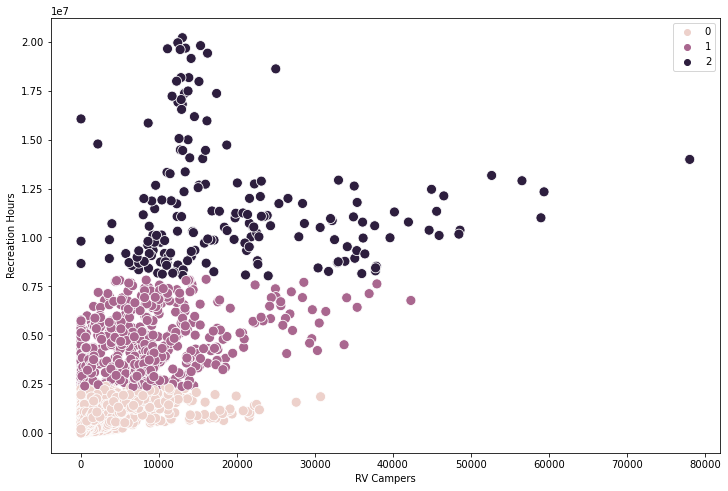

In [18]:
# Plotting the clusters for the "RecHours" and "RVCampers" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stats['RVCampers'], y=df_stats['RecHours'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('RV Campers')
plt.ylabel('Recreation Hours')
plt.show()

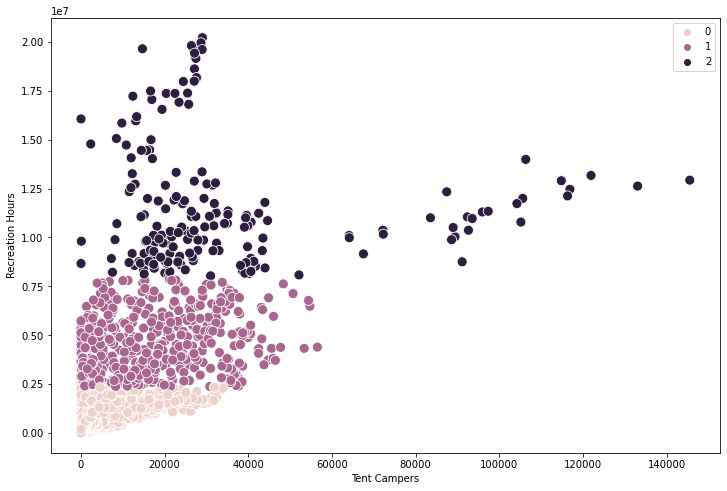

In [19]:
# Plotting the clusters for the "TentCampers" and "RecHours" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stats['TentCampers'], y=df_stats['RecHours'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Tent Campers') 
plt.ylabel('Recreation Hours') 
plt.show()

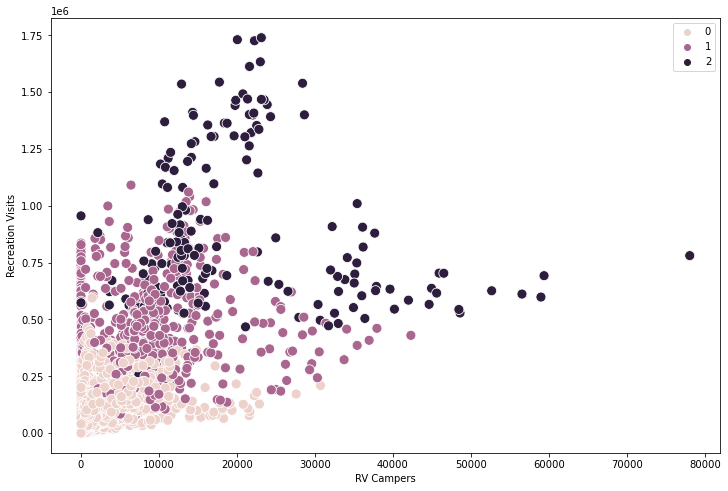

In [20]:
# Plotting the clusters for the "RVCampers" and "RecVisits" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stats['RVCampers'], y=df_stats['RecVisits'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('RV Campers')
plt.ylabel('Recreation Visits')
plt.show()

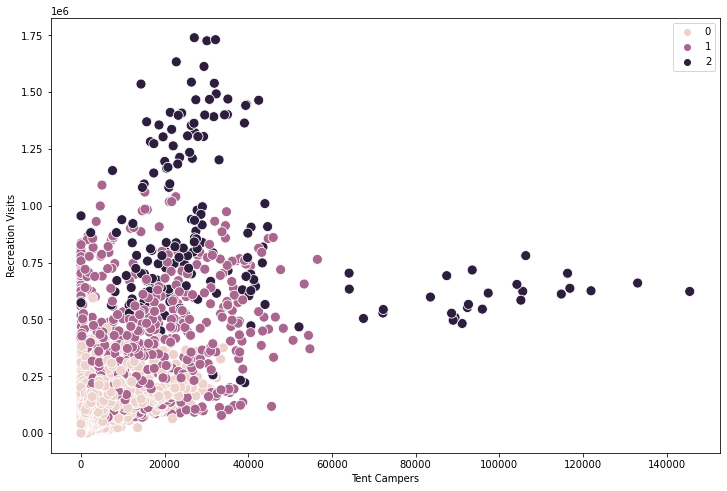

In [21]:
# Plotting the clusters for the "TentCampers" and "RecVisits" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stats['TentCampers'], y=df_stats['RecVisits'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Tent Campers') 
plt.ylabel('Recreation Visits') 
plt.show()

#### Visualization Analysis

I was hoping that the clusters for the RecVisits plots would look a little more clearer, but they do not. This strengthens the fact that RecHours is the better variable to use.

As for the RecHours, the clustering makes sense. The larges cluster (8350) is the majority where the recreation hours & other variable were lowest. These most likely are comprised of the months when lands were closed (off-season; pandemic) or they were open, but staying in and around the lands were not allowed (pandemic).

In [22]:
# Creating better titles for the clusters to help with descriptive statistics

df.loc[df_stats['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df_stats['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_stats['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df.groupby('cluster').agg({'RecVisits':['mean', 'median'], 
                         'RecHours':['mean', 'median'], 
                         'TentCampers':['mean', 'median'],
                          'RVCampers':['mean', 'median'], 
                          'Backcountry':['mean', 'median']})

RecVisits                RecHours               TentCampers  \
                      mean    median          mean      median          mean   
cluster                                                                        
dark purple  866141.082873  745613.0  1.156753e+07  10597640.0  34415.325967   
pink          59870.841216   32961.5  3.255807e+05    141691.5   1412.346798   
purple       430789.336252  419635.0  4.411602e+06   4096436.0  15456.583187   

                       RVCampers          Backcountry         
            median          mean median          mean median  
cluster                                                       
dark purple  25972  19874.215470  15143  20909.856354  13659  
pink            26    854.601498      0    689.798032     49  
purple       13810   8054.672504   7181   8433.246935   5199

#### Stats Observations

The camping statistics, especially in the pink cluster, don't look very reliable at all. The 0-50 medians are indicative on just how many points had none of those available (closed for winter months & COVID-19 protocols). The hours and visit stats are strong and worth diving deeper into in the future.

#### How results could be useful for in the furute analytic process

Moving forward, the RecVisits and RechHours details will be a huge part of analyis with categorical data like ParkName & Month. They'll also be what I want to focus more on in time series analysis too. The camping variables could be helpful in time series too, but with them not being as strong as RecVisits/Hours, we'll see if they're used.

# 07. Exporting Data

In [24]:
# Exporting dataframe with Clusters column

df.to_csv(os.path.join(path, '02 Data', 'Prepd Data', 'NatlParks_clusters.csv'))